California

In [95]:
from keras import models
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input
from keras import optimizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.datasets import california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [96]:
# Load the data
(inputs, targets), (x_test, y_test) = datasets.california_housing.load_data(
    version="small", test_split=0.2, seed=2025
)

# Names of the features, they are not included in the dataset but are available from the source
feature_names = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude"
]

# Further split the training data into training and validation sets
# Split inputs and targets with a 80/20 ratio for training/validation
x_train, x_val, y_train, y_val = train_test_split(
    inputs, targets, test_size=0.2, random_state=2025
)

print("TRAINING",x_train.shape, y_train.shape)  # Training set
print("VALIDATION",x_val.shape, y_val.shape)      # Validation set
print("TEST",x_test.shape, y_test.shape)    # Test set

TRAINING (384, 8) (384,)
VALIDATION (96, 8) (96,)
TEST (120, 8) (120,)


- Training set: 64% of the entire dataset.
- Validation set: 16% of the entire dataset.
- Test set: 20% of the entire dataset.

In [97]:
# Normalize input features
mean = x_train.mean(axis=0)  # Compute mean from training set
std = x_train.std(axis=0) + 1e-8  # Add small epsilon to avoid division by zero
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
x_val = (x_val - mean) / std

# Scale target values
y_train /= 1e5
y_test /= 1e5
y_val /= 1e5

print(x_train.mean(axis=0))  # Should be close to 0
print(x_train.std(axis=0))   # Should be close to 1

[ 3.1362459e-04  5.7689642e-04 -8.5681677e-08 -3.3061951e-08
  3.4614157e-08  4.6566129e-09 -4.6566129e-10  1.8874805e-07]
[0.9999997  1.         0.9999992  0.9999999  1.0000001  0.99999994
 1.         1.        ]


### Model

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

Test MAE: 0.45


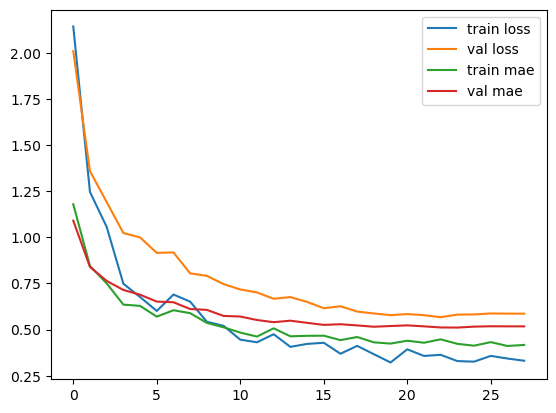

In [105]:
earlyStop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lrScaler = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3)

basic_model = models.Sequential([
    Input(shape=(8,)),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

basic_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
basic_model.summary()
basic_model.fit(x_train, y_train, epochs=100, verbose=0, batch_size=4, validation_data=(x_val, y_val), callbacks=[earlyStop, lrScaler])

# Evaluate the model
loss, mae = basic_model.evaluate(x_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")

# Plot the training history
history = basic_model.history.history
plt.figure()
plt.plot(history['loss'], label='train loss')
plt.plot(history['val_loss'], label='val loss')
plt.plot(history['mae'], label='train mae')
plt.plot(history['val_mae'], label='val mae')
plt.legend()
plt.show()